<a href="https://colab.research.google.com/github/Alam710/Object-Oriented-programming/blob/main/Ex03_GD4LOG_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv('/content/DIABETES.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
Correlation = data.corr()
Correlation['Outcome'].abs().sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [27]:
# We select atributes having corr.coeff larger than 0.10
dataset = data[['Glucose', 'BMI', 'Age', 'Pregnancies', \
                'DiabetesPedigreeFunction', 'Insulin', 'Outcome']]
dataset.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [28]:
X = dataset.iloc[:, :-1]    # independent varible
y = dataset.iloc[:, -1]     # dependent variable

X.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148,33.6,50,6,0.627,0
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,0
3,89,28.1,21,1,0.167,94
4,137,43.1,33,0,2.288,168


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[ 0.84832379  0.20401277  1.4259954   0.63994726  0.46849198 -0.69289057]
 [-1.12339636 -0.68442195 -0.19067191 -0.84488505 -0.36506078 -0.69289057]
 [ 1.94372388 -1.10325546 -0.10558415  1.23388019  0.60439732 -0.69289057]
 [-0.99820778 -0.49404308 -1.04154944 -0.84488505 -0.92076261  0.12330164]
 [ 0.5040552   1.4097456  -0.0204964  -1.14185152  5.4849091   0.76583594]
 [-0.15318486 -0.81134119 -0.27575966  0.3429808  -0.81807858 -0.69289057]
 [-1.34247638 -0.12597727 -0.61611067 -0.25095213 -0.676133    0.07120427]
 [-0.184482    0.41977549 -0.36084741  1.82781311 -1.02042653 -0.69289057]
 [ 2.38188392 -0.18943689  1.68125866 -0.54791859 -0.94794368  4.02192191]
 [ 0.12848945 -4.06047387  1.76634642  1.23388019 -0.7244549  -0.69289057]]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=0)

# The following is an example of using LR from Scikit-Learn

In [31]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

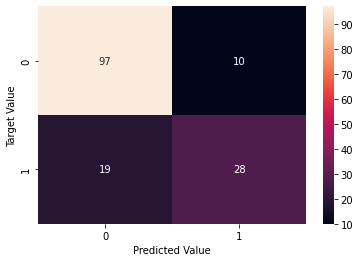

In [33]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Target Value'], colnames = ['Predicted Value'])
sns.heatmap(confusion_matrix, annot=True)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



## **From Scratch Code**

In [35]:
#Definisikan fungsi yang digunakan dalam Logistic Regression

def sigmoid(z):
  return 1.0(1+np.exp(-z))

In [36]:
def loss(y, y_hat):
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
  return loss

In [37]:
def gradients(X, y, y_hat):
  # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [38]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [39]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [40]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [41]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [42]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
#accuracy(X, y_hat=predict(X))

In [43]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

In [44]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

TypeError: ignored

In [ ]:
accuracy(X, y_hat=predict(X))